# What are we doing here?
This is the Infinityworks Data Science 101 workshop. We will be training a model to predict...*drum roll*...The weight of various star wars characters based on their other vital statistics.

Don't say we didn't try to make this exciting!

## Wait, what is this sourcery? Am in an IDE here or what?
This is a Jupyter Notebook. It's a standard bit of kit in Data Science circles. It's shite for proper code dev but there's few better tools for doing investigative coding and mixing it with notes and charts. If you want to learn a bit more then there's a link [here](https://github.com/datamacgyver/jupyter_pandas_demo/blob/main/learn_pandas.ipynb).

For now, just enjoy the ride and have a play. If, for example, you click on this text you can edit it as Markdown.

To run a cell press `ctrl+enter` or `shift+enter`. You will need to do this to see what the code outputs!

### First things first, we need some libraries

In [101]:
import pandas as pd     # Standard Python data handling library. Lets you store tables (often called `DataFrames`)
import seaborn as sns   # Plotting library, there's many to choose from but this is a stalwart
import matplotlib.pyplot as plt  # Matplotlib is the underlying library to seaborn, it's used to do some fancy stuff later.

# Sklearn is the standard Python stats tooling. It's...large and unwieldy but goes.
from sklearn.linear_model import LinearRegression                    # Models
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Error metrics
from sklearn.model_selection import train_test_split                 # Splitting data (I'll explain later)


### Now, some data
We aren't going to go too deep into this but you should **ALWAYS** look in depth at your data first, understand where it's coming from and how each bit relates to each other bit.

In [102]:
# pandas makes it easy for us to read a csv straight into a dataframe
# Note I'm downloading from the internet here!
df = pd.read_csv("https://raw.githubusercontent.com/infinityworks/academy_datascience_101/main/characters.csv")

df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,Tatooine,Human
1,Jabba Desilijic Tiure,175.0,1358.0,NaN,"green-tan, brown",orange,600BBY,hermaphrodite,Nal Hutta,Hutt
2,Watto,137.0,NaN,black,"blue, grey",yellow,NaN,male,Toydaria,Toydarian
3,Sebulba,112.0,40.0,none,"grey, red",orange,NaN,male,Malastare,Dug
4,Quarsh Panaka,183.0,NaN,black,dark,brown,62BBY,male,Naboo,NaN


### These data don't look great!
Look at the mass column, there's NaNs (Pandas' version of Null), that will make predicting mass difficult! Let's get rid of them.

In [103]:
df = df[~pd.isnull(df.mass)]

df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,Tatooine,Human
1,Jabba Desilijic Tiure,175.0,1358.0,NaN,"green-tan, brown",orange,600BBY,hermaphrodite,Nal Hutta,Hutt
3,Sebulba,112.0,40.0,none,"grey, red",orange,NaN,male,Malastare,Dug
6,Darth Maul,175.0,80.0,none,red,yellow,54BBY,male,Dathomir,Zabrak
7,C-3PO,167.0,75.0,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid


Bit of code to break down there:
* `df[]` does a filter based on whatever is in the brackets
* `~` is a negation, it changes `True` to `False` and vice versa
* `pd.isnull()` returns `True` if a value is `NaN`
* `df.mass` selects the mass column from the dataframe

So - in short - we are filtering for when the mass column is not null.

## Now, let's model!
Sklearn provides many optimised algorithms/models for Data Science / ML tasks. While you can implement these yourself, the Sklearn versions will be much faster and more efficient for most use cases.

We want to know:
"Can we predict the height of a character when we know their mass?"


<AxesSubplot:xlabel='height', ylabel='pred_height'>

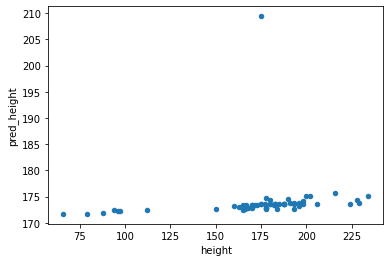

In [104]:
mod = LinearRegression()

# all Sklearn-compatible models use the fit method for training the model
mod.fit(
 df.mass.to_numpy().reshape(-1,1),   # The "Features" that our model will learn to predict with
 df.height                           # The know values our model will try to predict
)

# ... a model will have a predict method for making predictions using a trained model
df["pred_height"] = mod.predict(df.mass.to_numpy().reshape(-1,1))

# as in the line above, it's simple to add new columns to our existing DataFrame
df["raw_error"] = df.pred_height - df.height

df.plot.scatter(x="height", y="pred_height")

Let's add a line of best fit here, what we expect to see if predictions == actual mass.

As you can see, it's a `bag o'shite` but the thing to note is that the *error* in these predictions is the difference between each blue point and the green line

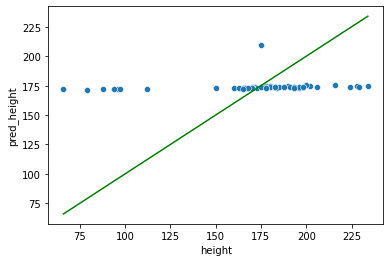

In [105]:
fig, ax = plt.subplots(figsize=(6, 4))
p1 = sns.scatterplot(data=df, x='height', y='pred_height', ax=ax)
p2 = sns.lineplot(data=df, x='height', y='height', color='g', ax=ax)

# What's gone wrong?
We will do another pandas filter here, but this time on column name. Then we will sort on the error column to find the worst offenders.

It's fair to say it's all Jabba's fault!

In [106]:
cols = ["name", "height", "mass", "raw_error"]

df[cols].sort_values("raw_error").head()

,name,height,mass,raw_error
77,Tarfful,234.0,136.0,-58.897057
68,Lama Su,229.0,88.0,-55.244439
18,Chewbacca,228.0,112.0,-53.570748
39,Roos Tarpals,224.0,82.0,-50.412862
76,Grievous,216.0,159.0,-40.251437


# Can we put a number on the error?
There's lots of ways, and what you use depends on the type of thing you are predicting (a category or a continuous variable). We are doing the latter so the favourites are:

* Mean Squared Error: Take the errors from above, square them and add them together. This means that big errors get magnified, helping us to see when something is *really* wrong
* Root Mean Squared Error: Take the square root of the Mean Squared Error. Useful as the result is easier to relate to your data.
* Mean Absolute error: Average of the raw errors, a bit crap as negatives cancel out the positives!

Have a look at the below and try to relate what you are seeing with the bullets and the table above, do you get why the answers are different? Which do you think is best in this instance?

In [107]:
# sklearn also provides us with numerous methods to calculate the performance of our models
{
 "mean_squared_error": mean_squared_error(df.height, df.pred_height),
 "root_mean_squared_error": mean_squared_error(df.height, df.pred_height, squared=False),
 "mean_absolute_error": mean_absolute_error(df.height, df.pred_height)
}

{'mean_squared_error': 1218.6549478618679,
 'root_mean_squared_error': 34.90923871787908,
 'mean_absolute_error': 23.673467238348255}

# What do we do about Jabba?
Oh, lots of things. We could add species as a variable in the model, allowing it to learn that Hutts are a little different to everyone else. We could just drop him from the data and tell the customer "We can't predict Hutts". Given the data we have I'm going with the second option.

I'm also going to add some complexity here. It's generally considered bad form to evaluate your model with the same data that you trained it with. It could just learn some nuance in your data and not work in production!

As such, we are going to split the data into a train and a test set while we are at it.

In [108]:
# Filter out all Hutts, they just don't lend themselves to BMI calculations!
df_no_hutts = df.loc[df.species != "Hutt"]

# shape gives us row, column count so we can be sure we've not done anything silly
print(df.shape, df_no_hutts.shape)

(59, 12) (58, 12)


In [109]:
# Now split the data into training and test sets. Check shape again.
height_train, height_test, mass_train, mass_test = train_test_split(df_no_hutts.height, df_no_hutts.mass, test_size=0.20)

print(height_train.shape, height_test.shape)

(46,) (12,)


In [110]:
# Train the new model
mod_2 = LinearRegression()
mod_2.fit(mass_train.to_numpy().reshape(-1,1), height_train)

pred_height = mod_2.predict(mass_test.to_numpy().reshape(-1,1))

# The next bit is up to you!
I've given you some empty cells below but you can make more or delete them as required. Go steal some code from higher up (or just t'internet) and tell me:

* Which model is better?
* Why?

In [111]:
# Old model
{
 'mean_squared_error': 34404.13501442758,
 'root_mean_squared_error': 185.48351682677244,
 'mean_absolute_error': 118.91932656471072
 }

{'mean_squared_error': 34404.13501442758,
 'root_mean_squared_error': 185.48351682677244,
 'mean_absolute_error': 118.91932656471072}

In [112]:
# new model
{
 "mean_squared_error": mean_squared_error(height_test, pred_height),
 "root_mean_squared_error": mean_squared_error(height_test, pred_height, squared=False),
 "mean_absolute_error": mean_absolute_error(height_test, pred_height)
}

{'mean_squared_error': 698.5608050981244,
 'root_mean_squared_error': 26.430300889284716,
 'mean_absolute_error': 20.600657608778956}

<AxesSubplot:xlabel='pred_height', ylabel='actual'>

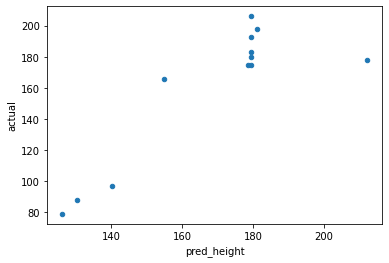

In [113]:
pred_df = pd.DataFrame({"pred_height": pred_height, "actual": height_test})
pred_df.plot.scatter("pred_height", "actual")

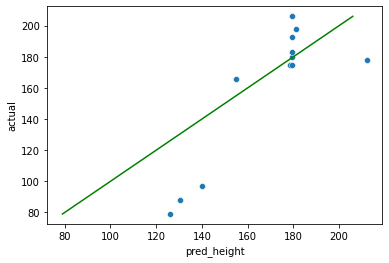

In [114]:
fig, ax = plt.subplots(figsize=(6, 4))
p1 = sns.scatterplot(data=pred_df, x='pred_height', y='actual', ax=ax)
p2 = sns.lineplot(data=pred_df, x='actual', y='actual', color='g', ax=ax)